# Anàlisi de dades exploratòria (EDA) del dataset del banc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import scipy.stats as stats

## Descriptius bàsics

Descripció bàsica de les diferents característiques del dataset segons la documentació:

| Variable Name | Role     | Type         | Demographic       | Description                                                                                                                                                                                                                     | Units | Missing Values |
|---------------|----------|--------------|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| age           | Feature  | Integer      | Age               |                                                                                                                                                                                                                                 |       | no             |
| job           | Feature  | Categorical  | Occupation        | Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')                                        |       | no             |
| marital       | Feature  | Categorical  | Marital Status    | Marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)                                                                                                           |       | no             |
| education     | Feature  | Categorical  | Education Level   | (Categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')                                                                                          |       | no             |
| default       | Feature  | Binary       |                   | Has credit in default?                                                                                                                                                                                                         |       | no             |
| balance       | Feature  | Integer      |                   | Average yearly balance                                                                                                                                                                                                         | Euros | no             |
| housing       | Feature  | Binary       |                   | Has housing loan?                                                                                                                                                                                                              |       | no             |
| loan          | Feature  | Binary       |                   | Has personal loan?                                                                                                                                                                                                             |       | no             |
| contact       | Feature  | Categorical  |                   | Contact communication type (categorical: 'cellular', 'telephone')                                                                                                                                                             |       | yes            |
| day   | Feature  | Date         |                   | Last contact day of the week                                                                                                                                                                                                   |       | no             |
| month         | Feature  | Date         |                   | Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                               |       | no             |
| duration      | Feature  | Integer      |                   | Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.                     |       | no             |
| campaign      | Feature  | Integer      |                   | Number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                         |       | no             |
| pdays         | Feature  | Integer      |                   | Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)                                                                             |       | yes            |
| previous      | Feature  | Integer      |                   | Number of contacts performed before this campaign and for this client                                                                                                                                                         |       | no             |
| poutcome      | Feature  | Categorical  |                   | Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')                                                                                                                                  |       | yes            |
| deposit             | Target   | Binary       |                   | Has the client subscribed a term deposit?                                                                                                                                                                                      |       |                |


In [2]:
# carreguem el dataset
df = pd.read_csv('data/bank_dataset.csv')

In [3]:
# primeres linies del dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# informació general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [5]:
# EDA automàtic amb Sweetviz
report = sv.analyze(df)
report.show_html('reports/EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report reports/EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Realitzarem uns càlculs de les estadístiques bàsiques de les variables numèriques, categòriques i binàries per a tenir una idea de com estan distribuïdes les dades.

Per les **variables numèriques**, calcularem:
- **Mitjana**: aporta una mesura central representativa per la variable
- **Mediana**: proporciona una mesura de la tendència central menys influenciada pels extrems
- **Moda**: permet identificar el valor més freqüent
- **Desviació Estàndard**: mesura la dispersió dels valors respecte a la mitjana
- **Mínim i Màxim**: identifica els límits dels valors d'una variable
- **Percentils**: permet veure la distribució dels valors (e.g., 25%, 50%, 75%)
- **Histograma**: visualitza la distribució dels valors

Per les **variables categòriques**, calcularem:
- **Distribució de freqüències (histograma)**: aporta informació sobre la prevalença de cada categoria
- **Proporcions (percentatges)**: complementa la freqüència per entendre la importància relativa de cada categoria

Per les **variables binàries**, calcularem:
- **Proporció de "yes" i "no"**: identifica el grau d'incidència d'una característica binària

### Variables numèriques

In [6]:
# creem un dataframe amb les variables numèriques
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerical = df[numeric_features]

# descripció estadística del dataset per defecte
numerical_stats = df_numerical.describe()

# afegim la mediana i la moda
numerical_stats.loc['median'] = df_numerical.median()
numerical_stats.loc['mode'] = df_numerical.mode().iloc[0]

print(numerical_stats)

                 age       balance      duration      campaign         pdays  \
count   11152.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean       41.235384   1528.538524    371.993818      2.508421     51.330407   
std        11.914934   3225.413326    347.128386      2.722077    108.758282   
min        18.000000  -6847.000000      2.000000      1.000000     -1.000000   
25%        32.000000    122.000000    138.000000      1.000000     -1.000000   
50%        39.000000    550.000000    255.000000      2.000000     -1.000000   
75%        49.000000   1708.000000    496.000000      3.000000     20.750000   
max        95.000000  81204.000000   3881.000000     63.000000    854.000000   
median     39.000000    550.000000    255.000000      2.000000     -1.000000   
mode       31.000000      0.000000     97.000000      1.000000     -1.000000   

            previous  
count   11162.000000  
mean        0.832557  
std         2.292007  
min         0.000000  
25% 

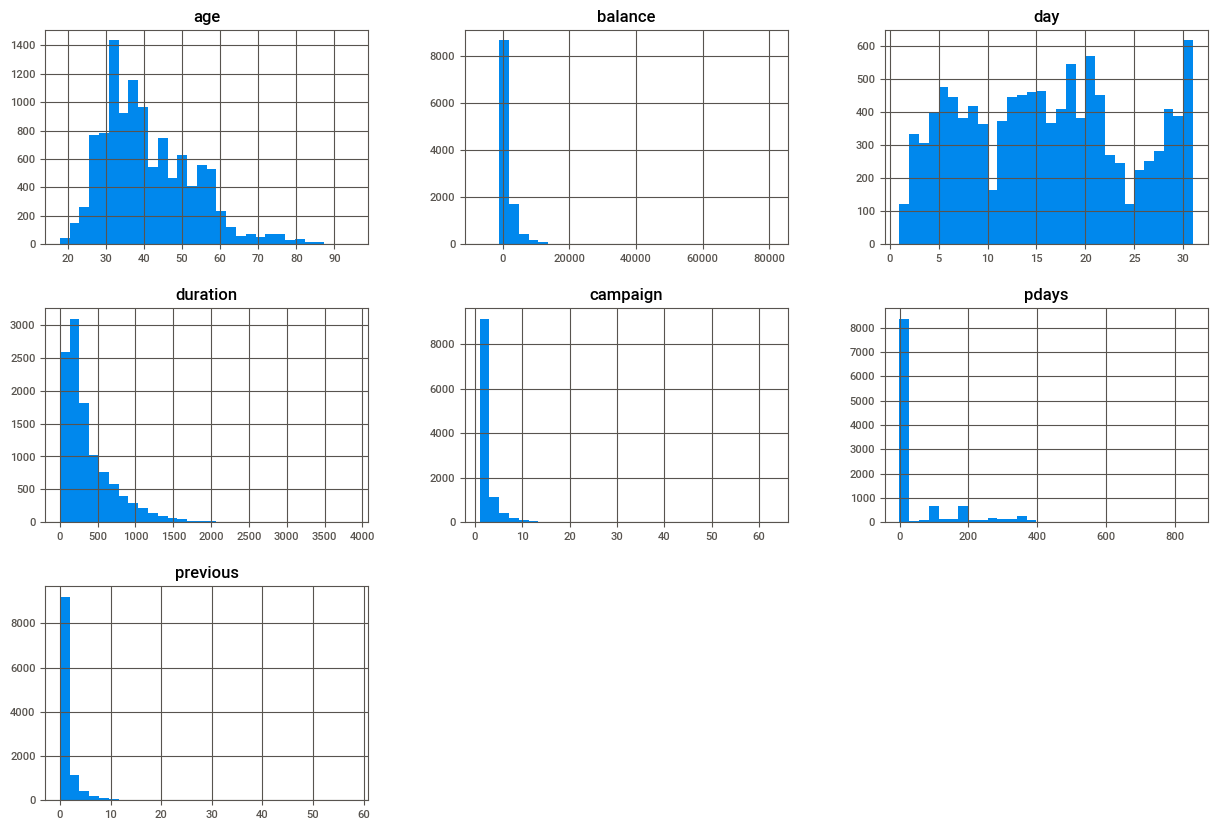

In [7]:
# histograma de cada variable numèrica
df.hist(bins=30, figsize=(15, 10))
plt.show()

### Variables categòriques

In [8]:
# creem un dataframe amb les variables categòriques
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome']
df_categorical = df[categorical_features]

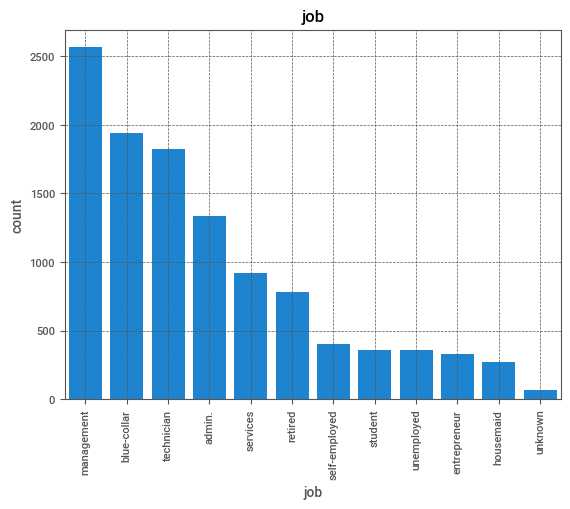

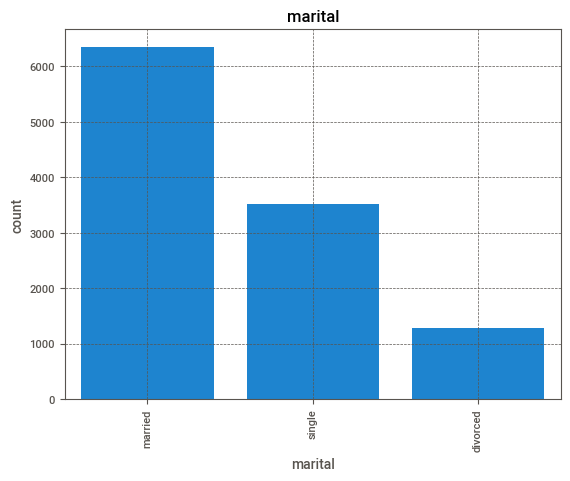

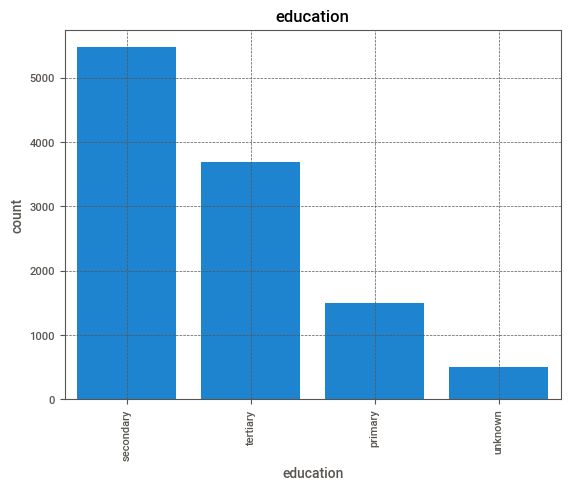

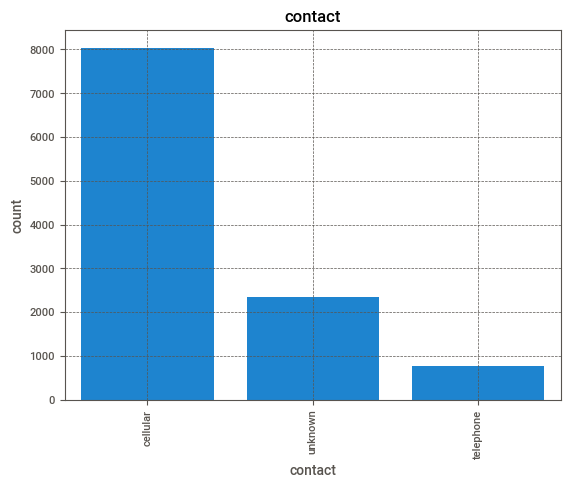

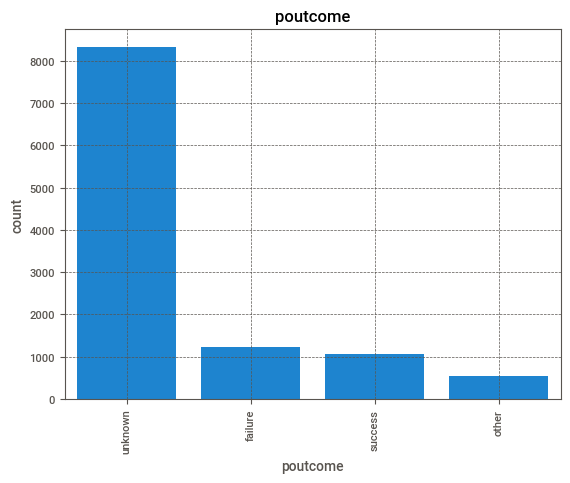

In [9]:
# histograma de cada variable categòrica
for col in df_categorical.columns:
    plt.title(col)
    sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    plt.grid(linestyle='--', linewidth=0.5)
    plt.xticks(rotation=90)
    plt.show()

### Variables binàries

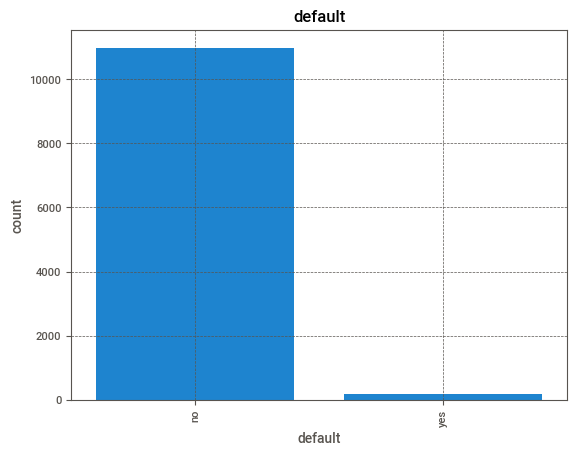

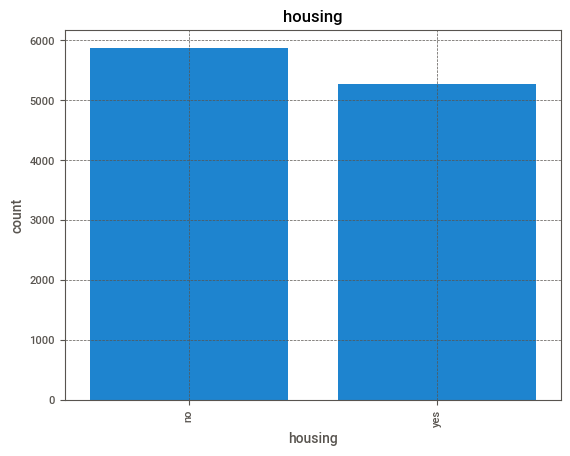

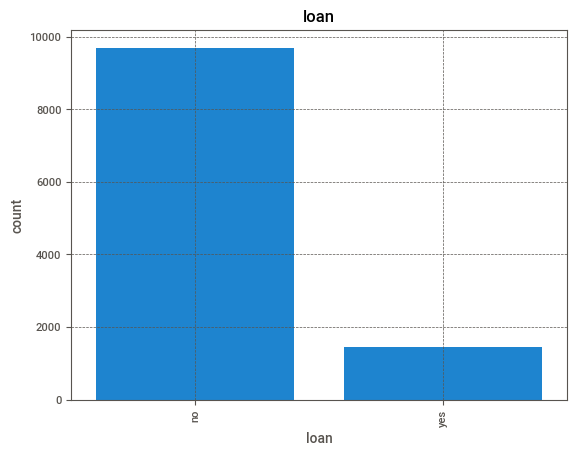

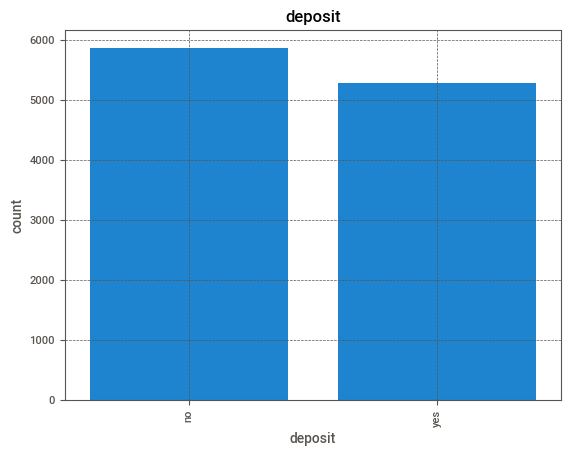

In [10]:
# creem un dataframe amb les variables binàries
binary_features = ['default', 'housing', 'loan', 'deposit']
df_categorical = df[binary_features]

# histograma de cada variable binària
for col in df_categorical.columns:
    plt.title(col)
    sns.countplot(x=col, data=df, order = df[col].value_counts().index)
    plt.grid(linestyle='--', linewidth=0.5)
    plt.xticks(rotation=90)
    plt.show()

## Detecció i gestió de valors faltants

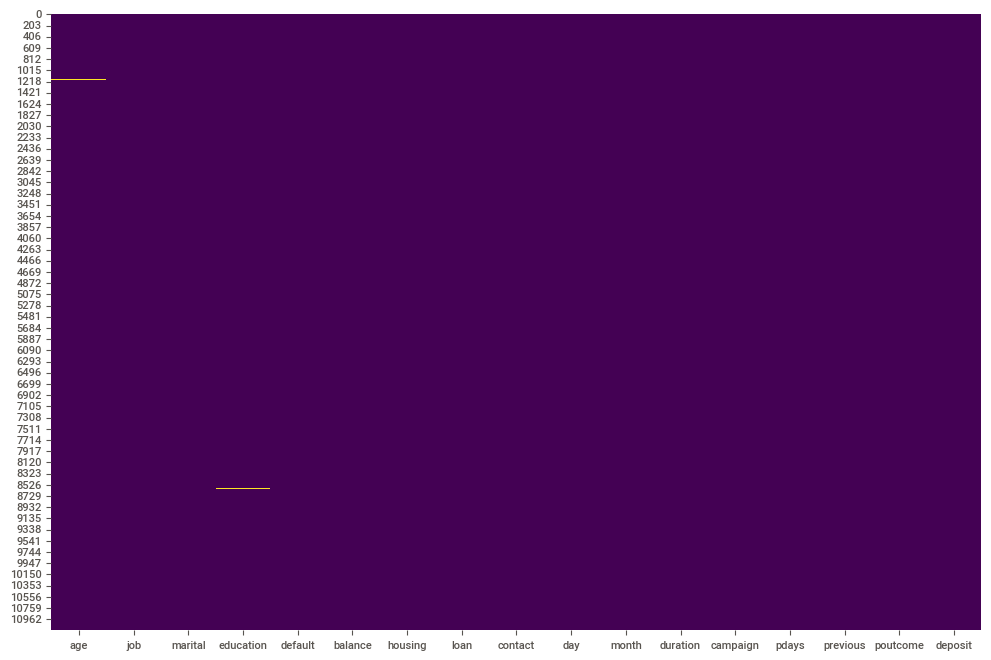

In [11]:
# visualització de valors nuls
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

Aquest gràfic mostra que hi ha un nombre molt poc significatiu de valors faltants. Comprovem-ho mirant directament el nombre de valors faltants per a cada variable

In [12]:
# comptem els valors nuls per columna
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [13]:
# percentatge de registres amb valors nuls respecte el total
df.isnull().sum() / len(df) * 100

age          0.089590
job          0.000000
marital      0.044795
education    0.062713
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
deposit      0.000000
dtype: float64

Com que els valors nuls suposen menys d'un 0.2% del total dels regitres, els podríem eliminar sense problema. No obstant, per aquesta anàlisi:
- En les **variables numèriques** optem per posar la **mediana** ja que, en general, les variables associades no tenen una distribució normal.
- En les **variables categòriques i binàries**, optem per posar la **moda** ja que aquestes variables no tenen una escala de valors.

In [14]:
# substituim els valors nuls de age, job, marital i education per la mediana
df_no_nulls = df.copy()

df_no_nulls['age'] = df_no_nulls['age'].fillna(df_no_nulls['age'].median())
df_no_nulls['job'] = df_no_nulls['job'].fillna(df_no_nulls['job'].mode().iloc[0])
df_no_nulls['marital'] = df_no_nulls['marital'].fillna(df_no_nulls['marital'].mode().iloc[0])
df_no_nulls['education'] = df_no_nulls['education'].fillna(df_no_nulls['education'].mode().iloc[0])

## Detecció i gestió d'outliers

### Mètode IQR

Per detectar els outliers, primerament utilitzarem el **mètode IQR** aplicat només a les variables numèriques. El mètode IQR (amplitud interquartílica) és una tècnica estadística per detectar valors atípics (outliers) en dades numèriques. Es basa en el rang entre el primer quartil (Q1, el 25% més baix de les dades) i el tercer quartil (Q3, el 75% més alt). 

L'IQR es calcula com:

$
\text{IQR} = Q3 - Q1
$

Aquest valor representa la dispersió central del 50% de les dades.

Els límits per detectar valors atípics es calculen de la següent manera:

- Límit inferior: $ Q1 - 1.5 \cdot \text{IQR} $
- Límit superior: $ Q3 + 1.5 \cdot \text{IQR} $

Els valors que es troben fora d’aquests límits són considerats valors atípics. Aquest mètode és robust davant de valors extrems i és adequat per a dades asimètriques o no normals, ja que no depèn de la mitjana ni de la desviació estàndard.



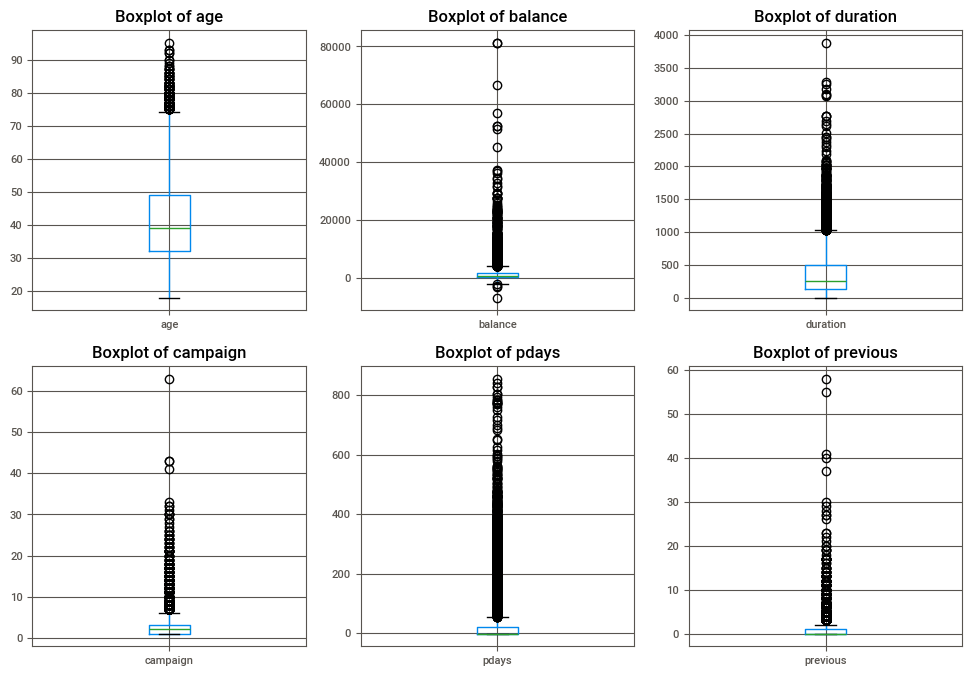

In [15]:
# representem els boxplots per a cada variable numèrica (factor=1.5)
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    df_no_nulls.boxplot(column=column)
    plt.title(f'Boxplot of {column}')

Observant els boxplots, podem veure que hi ha una gran quantitat d'outliers en totes les variables. Això és un indicador de que les dades no estan distribuides normalment, tal i com hem pogut veure anteriorment als histogrames.

In [16]:
# definim la funció per detectar outliers utilitzant el mètode IQR
def detect_outliers_iqr(df_no_nulls, column, factor):
    Q1 = df_no_nulls[column].quantile(0.25)
    Q3 = df_no_nulls[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = df_no_nulls[(df_no_nulls[column] < lower_bound) | (df_no_nulls[column] > upper_bound)]
    return outliers

factor = 1.5
# detectem els outliers per a cada columna numèrica
outlier_summary = {}
for column in numeric_features:
    outliers = detect_outliers_iqr(df_no_nulls, column, factor=factor)
    outlier_summary[column] = len(outliers)

plt.tight_layout()
plt.show()
print("factor:", factor)
print(outlier_summary)

<Figure size 640x480 with 0 Axes>

factor: 1.5
{'age': 171, 'balance': 1055, 'duration': 636, 'campaign': 601, 'pdays': 2750, 'previous': 1258}


In [17]:
# funció per eliminar outliers amb el mètode IQR
def remove_outliers_iqr(df_no_nulls, column, factor):
    outliers = detect_outliers_iqr(df_no_nulls, column, factor)
    df_no_outliers = df_no_nulls.drop(outliers.index)
    return df_no_outliers
    
# eliminem outliers de les columnes numèriques
df_no_nulls_outliers = df_no_nulls.copy()
for column in numeric_features:
    df_no_nulls_outliers = remove_outliers_iqr(df_no_nulls_outliers, column, factor=1.5)

# Verifiquem la nova mida del dataset
print(f"Mida original: {len(df_no_nulls)}")
print(f"Mida després de treure outliers: {len(df_no_nulls_outliers)}")

Mida original: 11162
Mida després de treure outliers: 6498


Si apliquéssim un factor 1.5 a totes les variables numèriques, eliminaríem més d'un 50% dels registres, la qual cosa no és viable. A continuació veiem el que significa mitjançant l'ús d'histogrames.

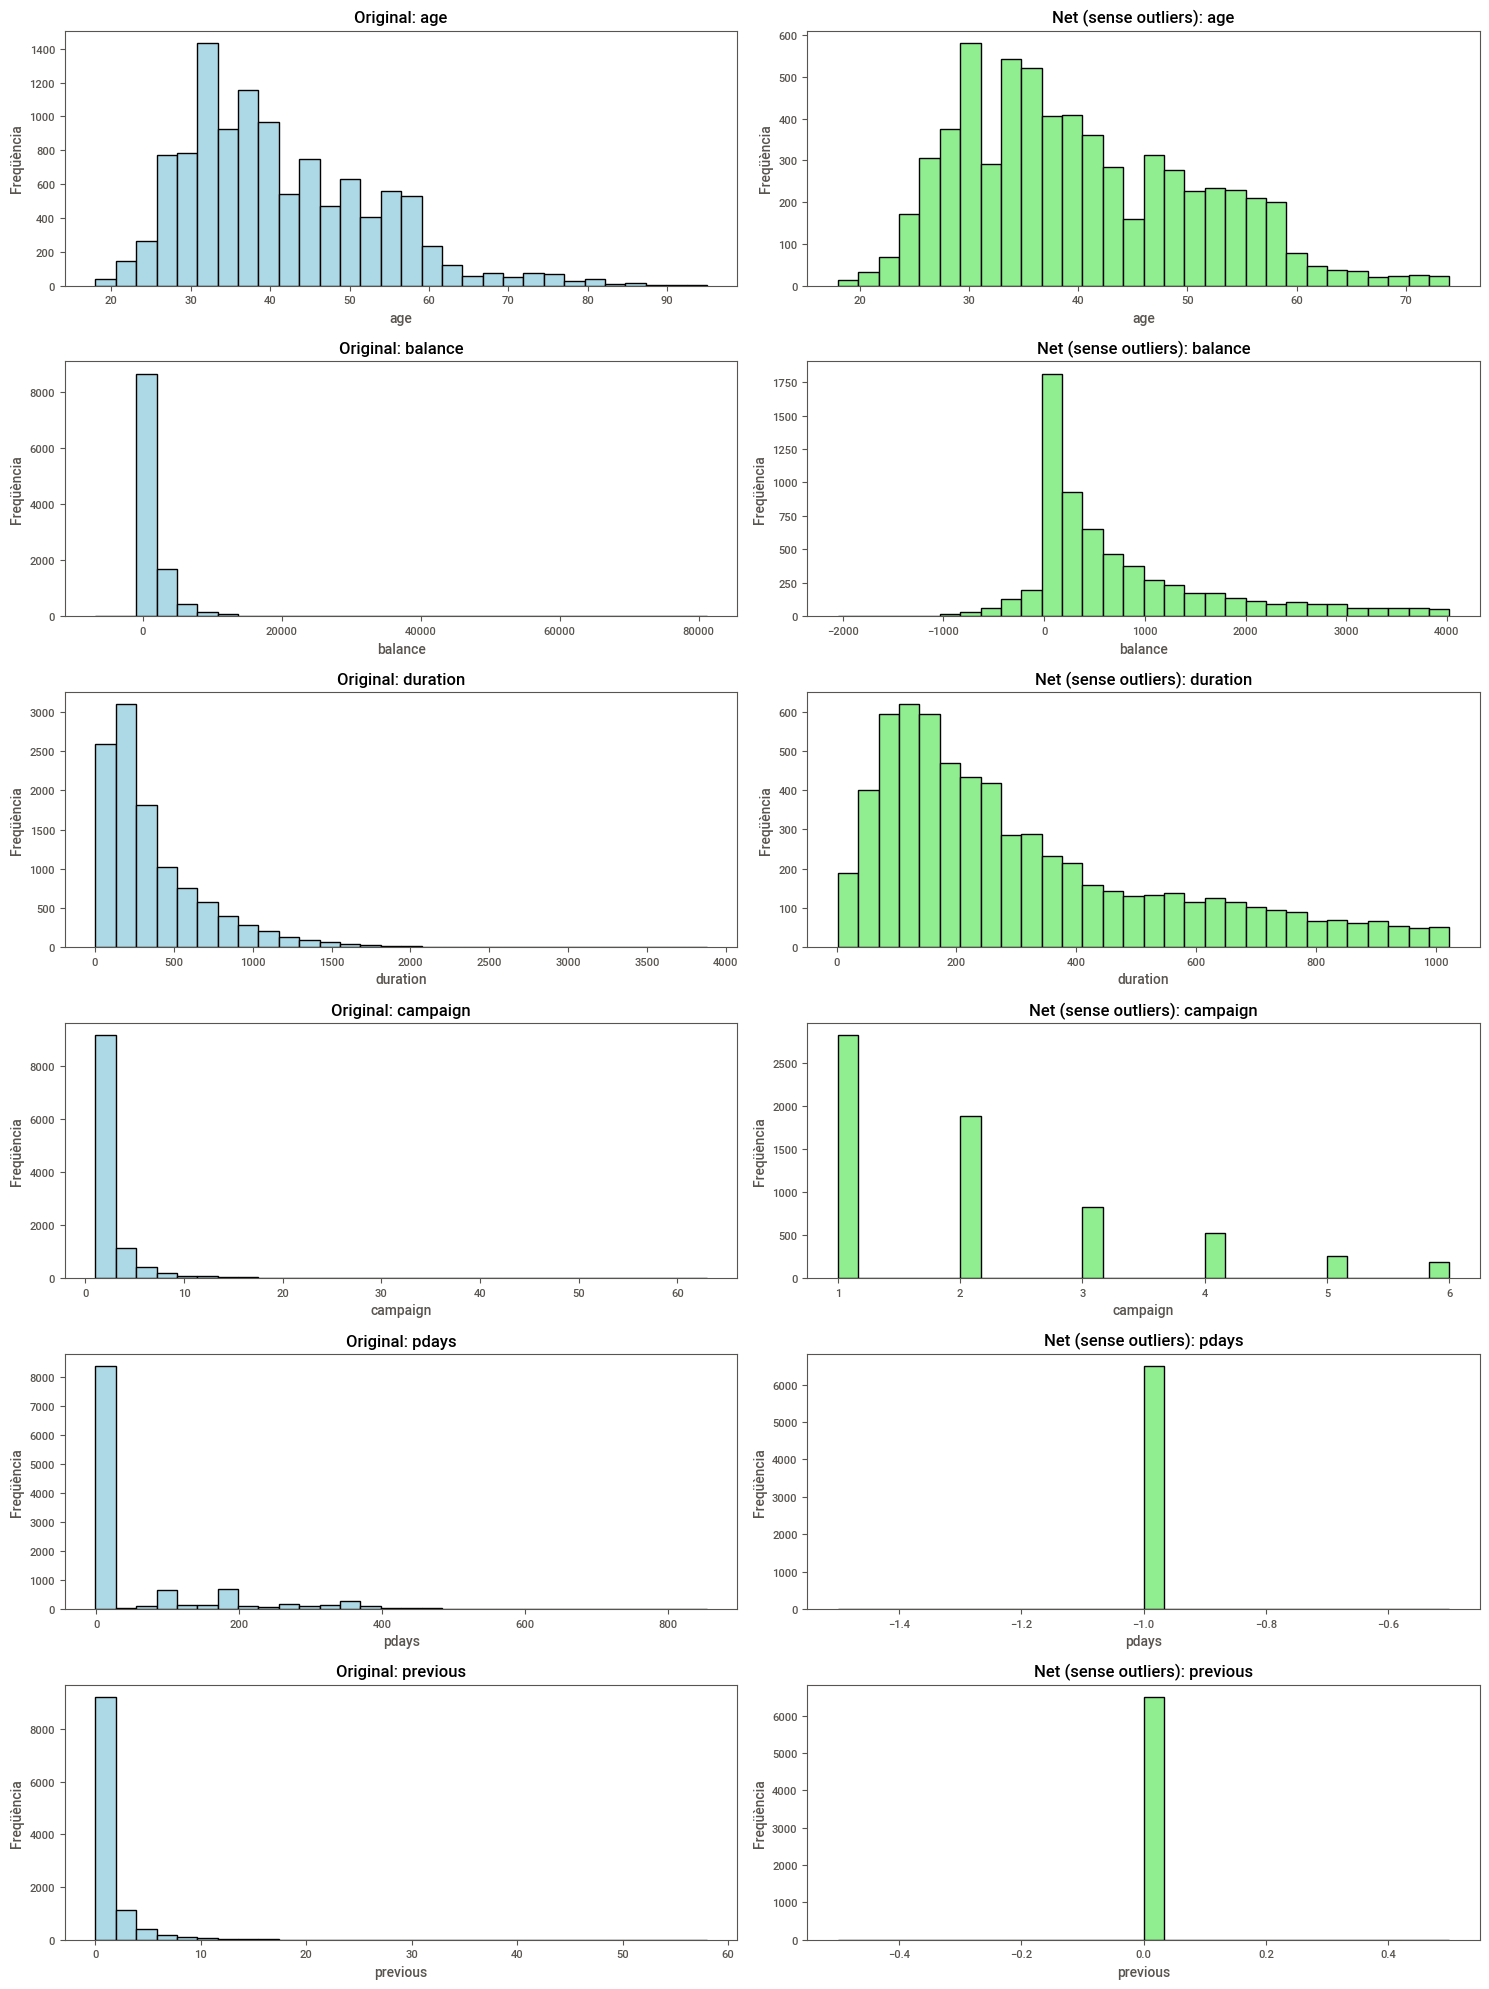

In [18]:
# histogrames comparatius abans i després de netejar outliers
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 2, 2*i-1)  # histograma original (esquerra)
    plt.hist(df[column].dropna(), bins=30, color='lightblue', edgecolor='black')
    plt.title(f"Original: {column}")
    plt.xlabel(column)
    plt.ylabel("Freqüència")
    
    plt.subplot(len(numeric_features), 2, 2*i)  # histograma net (dreta)
    plt.hist(df_no_nulls_outliers[column].dropna(), bins=30, color='lightgreen', edgecolor='black')
    plt.title(f"Net (sense outliers): {column}")
    plt.xlabel(column)
    plt.ylabel("Freqüència")

plt.tight_layout()
plt.show()

L'única variable que respon correctament és `age` i, en casos com `pdays` o `previous`, el mètode IQR converteix la variable a binària. En dades molt asimètriques i amb cues llargues, l’ús directe de l’IQR (que es basa en els quartils) pot portar a classificar molts valors de la cua de la distribució com a outliers encara que siguin perfectament coherents amb la naturalesa de la pròpia distribució. El mètode de la IQR suposa implícitament que la major part de les dades s’agrupen de manera relativament simètrica al voltant de la mediana, cosa que en distribucions molt esbiaixades no sempre es compleix.

S'han explorat altres tècniques, com ara una transformació de les dades a través de la tècnica Yeo-Johnson, que ajusta dades asimètriques perquè s'aproximin a una distribució normal i pot treballar amb valors positius, negatius i zeros. Això fa que a l'hora de detectar outliers a través del mètode IQR els resultats siguin més fiables. No obstant, aquesta tècnica no ha millorat significativament els resultats obtinguts amb l'eliminació dels outliers.

### Mètode Z-score

A continuació provarem el mètode **Z-score**, que es calcula a partir de la mitjana i la desviació estàndard. Encara que és especialment eficaç en distribucions normals, permet identificar valors que queden lluny de la mitjana (per sobre d’un cert nombre de desviacions estàndard), així que també pot ser vàlid per distribucions assimètriques.

El mètode Z-score consisteix a calcular, per a cada observació, quantes desviacions estàndard s’allunya de la mitjana de la variable. Concretament, a cada valor se li resta la mitjana i es divideix pel desviament estàndard, obtenint així un nou valor (el Z-score), segons l’equació:

$
Z = \frac{x - \bar{x}}{\sigma}
$

A partir d’un llindar determinat (per exemple, 3), qualsevol valor amb un Z-score superior (o inferior en termes absoluts) se sol considerar un outlier.

In [19]:
def detect_outliers_zscore(df_no_nulls, column, threshold=3):
    # calculem el z-score de la columna
    z_scores = stats.zscore(df_no_nulls[column])
    # seleccionem les files on el valor absolut del z-score és més gran que threshold
    outliers = df_no_nulls[np.abs(z_scores) > threshold]
    return outliers

# creem un conjunt (set) per guardar tots els índexs dels outliers
outliers_indices = set()
threshold = 3  # valor habitual per a Z-score
outlier_summary_zscore = {}

# per a cada columna numèrica, calculem quants outliers ens surten
for column in numeric_features:
    outliers = detect_outliers_zscore(df_no_nulls, column, threshold=threshold)
    outlier_summary_zscore[column] = len(outliers)
    # afegeix els índexs al conjunt
    outliers_indices.update(outliers.index)

print("Z-score threshold:", threshold)
print("Nombre d'outliers per columna:", outlier_summary_zscore)

Z-score threshold: 3
Nombre d'outliers per columna: {'age': 132, 'balance': 173, 'duration': 201, 'campaign': 210, 'pdays': 176, 'previous': 220}


Ara podem veure que **el nombre d'outliers és molt més acceptable**. Eliminem els outliers i realitzem uns histogrames comparatius per veure com el modifiquen les dades visualment

Mida original: 11162
Mida després de treure outliers: 10098


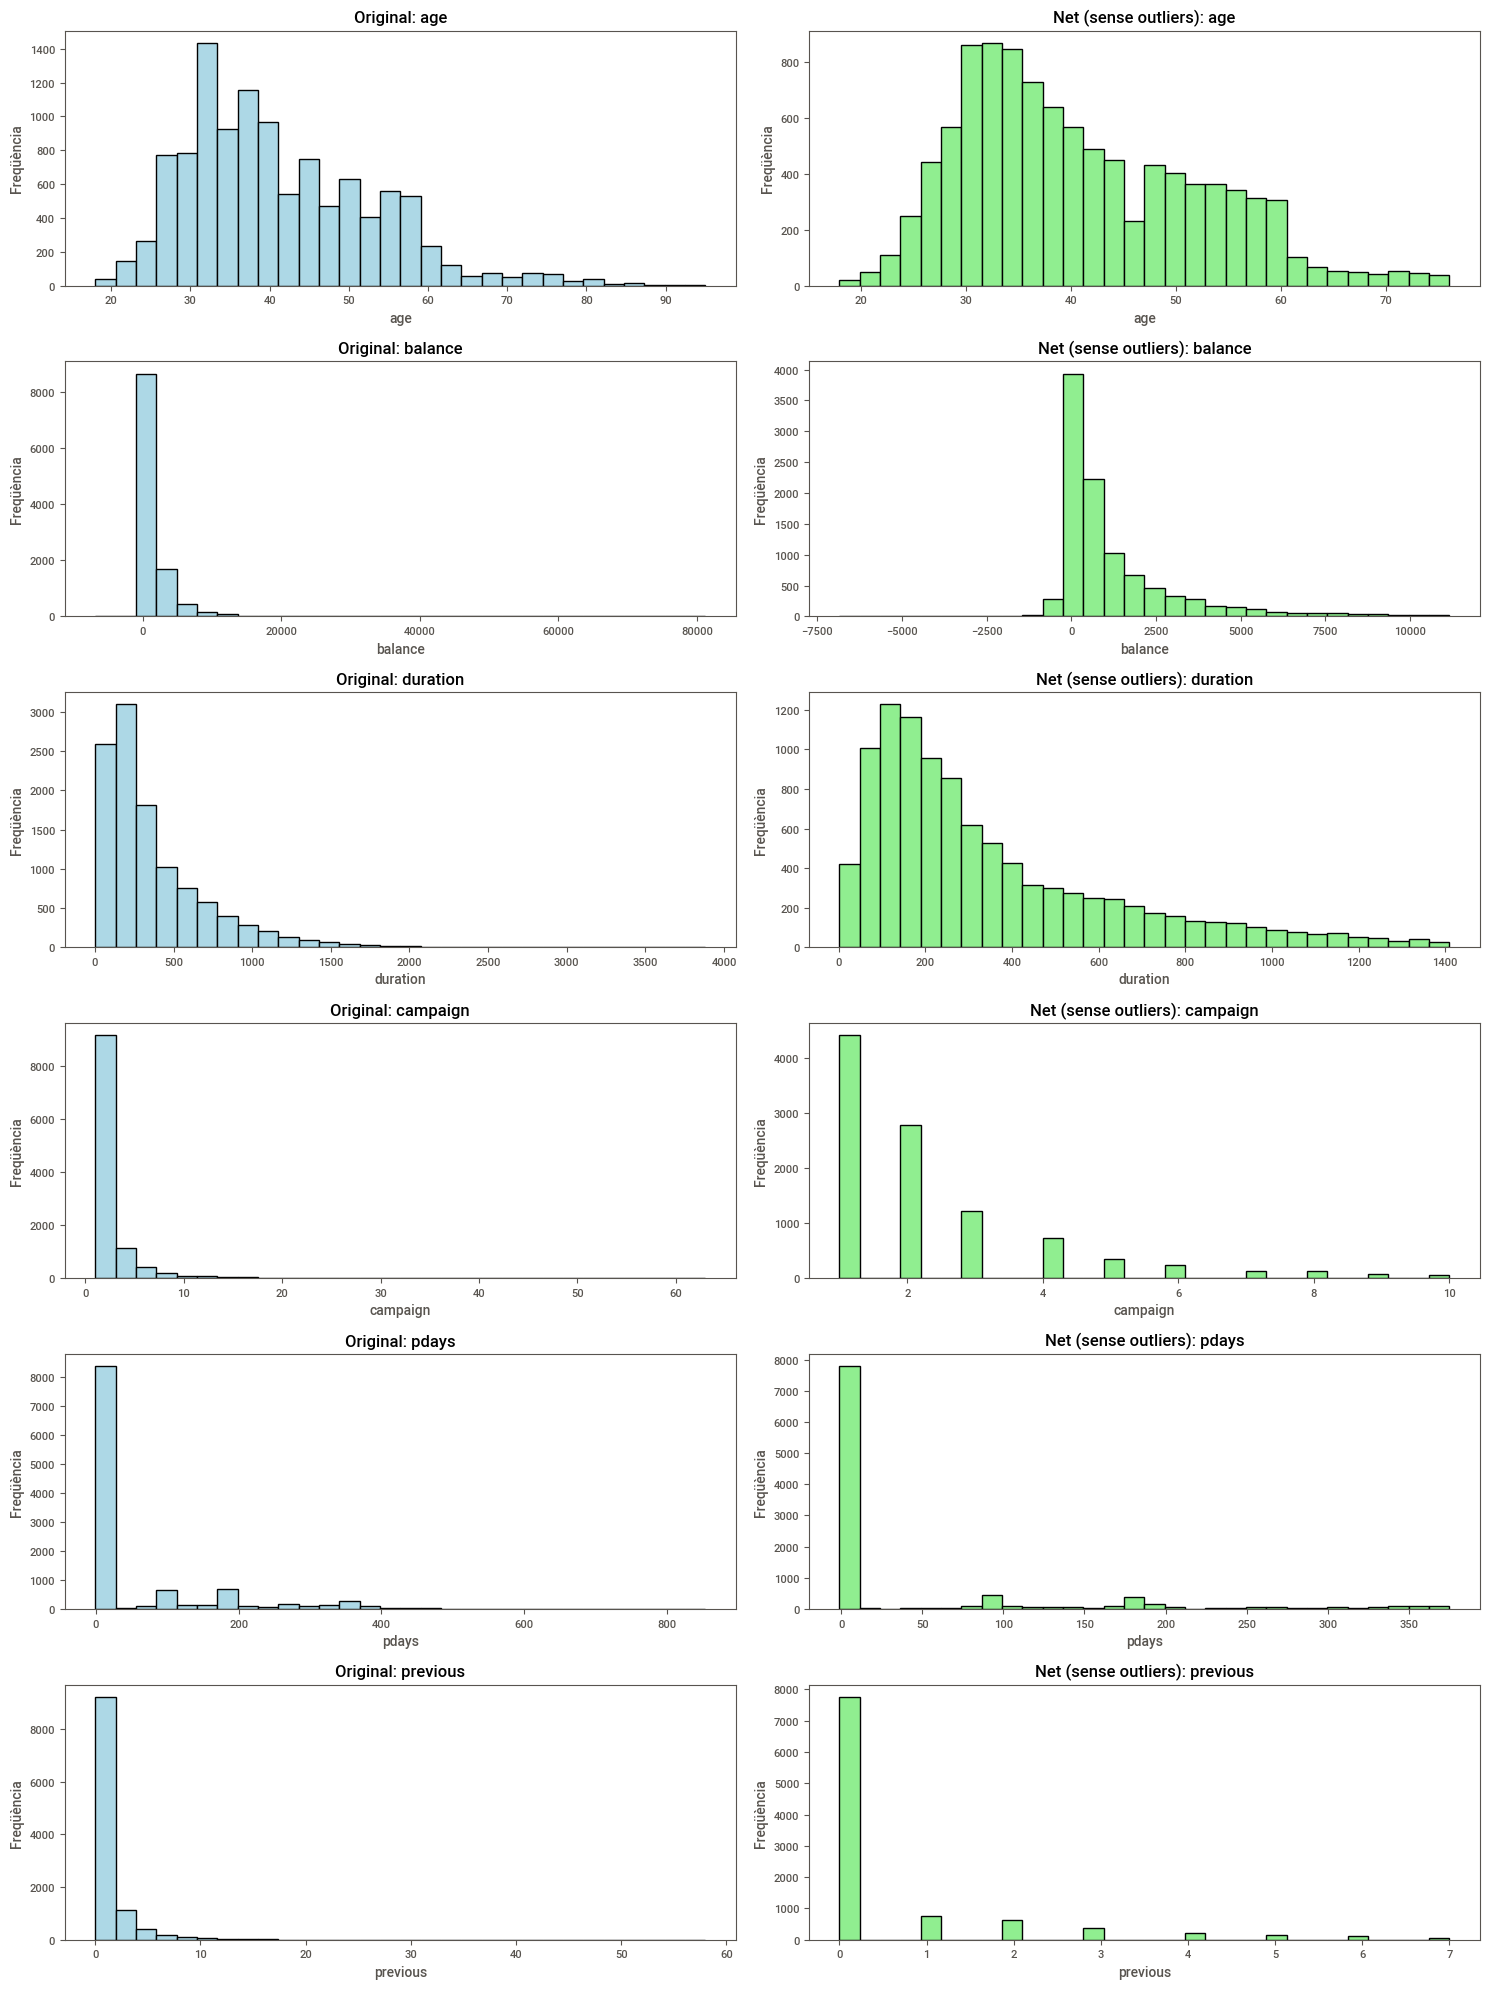

In [20]:
# dataframe sense els outliers
df_no_outliers = df_no_nulls.drop(index=outliers_indices)

# verifiquem la mida del dataset sense outliers
print(f"Mida original: {len(df_no_nulls)}")
print(f"Mida després de treure outliers: {len(df_no_outliers)}")

# histogrames comparatius abans i després de netejar outliers
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 2, 2*i-1)  # histograma original (esquerra)
    plt.hist(df[column].dropna(), bins=30, color='lightblue', edgecolor='black')
    plt.title(f"Original: {column}")
    plt.xlabel(column)
    plt.ylabel("Freqüència")
    
    plt.subplot(len(numeric_features), 2, 2*i)  # histograma net (dreta)
    plt.hist(df_no_outliers[column], bins=30, color='lightgreen', edgecolor='black')
    plt.title(f"Net (sense outliers): {column}")
    plt.xlabel(column)
    plt.ylabel("Freqüència")

plt.tight_layout()
plt.show()

Podem veure que, utilitzant el mètode Z-score, hem eliminat un nombre més raonable d'outliers i les dades són més fiables per a l'anàlisi

## Identificació de les característiques rellevants per a la variable resultant

Per identificar les característiques rellevant, crearem una **matriu de correlació** i observarem les relacions de les diferents variables amb la variable `deposit`. Abans, però, serà necessari realitzar una sèrie de transformacions per a poder treballar amb les variables categòriques i binàries.

In [21]:
# copiem el dataframe
df_transformed = df_no_outliers.copy()

# transformem les variables binàries a numèriques
binary_columns = ['default', 'housing', 'loan', 'deposit']
for col in binary_columns:
    df_transformed[col] = df_transformed[col].map({'yes': True, 'no': False})

# one-hot encoding per a variables categòriques
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
data = pd.get_dummies(df_transformed, columns=categorical_columns, drop_first=True)

# mostrem les primeres files del dataset transformat
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59.0,False,2343,True,False,5,1042,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,41.0,False,1270,True,False,5,1389,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,55.0,False,2476,True,False,5,579,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,54.0,False,184,False,False,5,673,2,-1,0,...,False,False,False,True,False,False,False,False,False,True
5,42.0,False,0,True,True,5,562,2,-1,0,...,False,False,False,True,False,False,False,False,False,True


<Axes: >

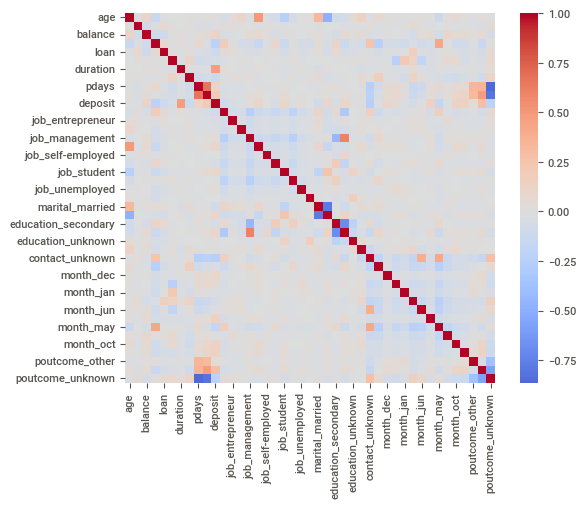

In [22]:
# generem la matriu de correlació
correlation_matrix = data.corr()
# mostrem la matriu de correlació
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, square=True)

In [23]:
# observem la correlació de les variables amb la variable deposit
correlation_with_deposit = data.corr()['deposit'].sort_values(ascending=False)
print(correlation_with_deposit)

deposit                1.000000
duration               0.481036
poutcome_success       0.286499
previous               0.192447
month_mar              0.140763
month_oct              0.136222
month_sep              0.133572
pdays                  0.126916
balance                0.115635
job_student            0.105932
education_tertiary     0.100231
marital_single         0.097189
job_retired            0.092488
month_dec              0.092352
month_feb              0.050318
poutcome_other         0.041813
job_management         0.036054
job_unemployed         0.032434
education_unknown      0.015408
age                    0.011091
contact_telephone      0.005243
job_unknown            0.001651
job_self-employed     -0.004473
job_technician        -0.008987
month_aug             -0.013626
month_jun             -0.016084
job_housemaid         -0.022780
month_jan             -0.023654
month_nov             -0.029122
default               -0.034083
job_entrepreneur      -0.036118
job_serv

No hi ha cap variable que tingui una correlació forta amb la variable `deposit`. No obstant, aquestes variables mostren una relació directa amb una major probabilitat de subscripció a un dipòsit:

1. **`duration`** **0.48**  
   - La durada de la trucada és el predictor més fort. Trucades més llargues tendeixen a correlacionar-se amb una major taxa de subscripció.

2. **`poutcome_success`** **0.29**  
   - Un resultat exitós en campanyes prèvies té una influència significativa en la decisió de subscripció.

3. **`previous`** **0.19**  
   - Haver estat contactat prèviament (no tenir un valor de -1) està associat amb una major probabilitat de subscripció.

Aquestes variables indiquen una menor probabilitat de subscripció a un dipòsit:
1. **`contact_unknown`** **-0.26**  
   - Quan el canal de contacte és desconegut, la probabilitat de subscripció disminueix significativament.

2. **`poutcome_unknown`** **-0.22**  
   - Si el resultat de campanyes prèvies és desconegut, es redueix la probabilitat de subscripció.

3. **`housing`** **-0.21**  
   - Els clients amb préstecs hipotecaris són menys propensos a subscriure.

 ## Detecció i gestió del desbalanç de classes

Primer de tot **mirem el desbalanç de la variable objectiu, `deposit`**. Seguidament veurem el desbalanç de les variables amb una correlació més alta per veure si hem de prendre algun tipus de decisió. Encara que ja hem generat els gràfics anteroirment, els tornem a generar per a tenir una visió més clara.

deposit
False    0.543969
True     0.456031
Name: proportion, dtype: float64


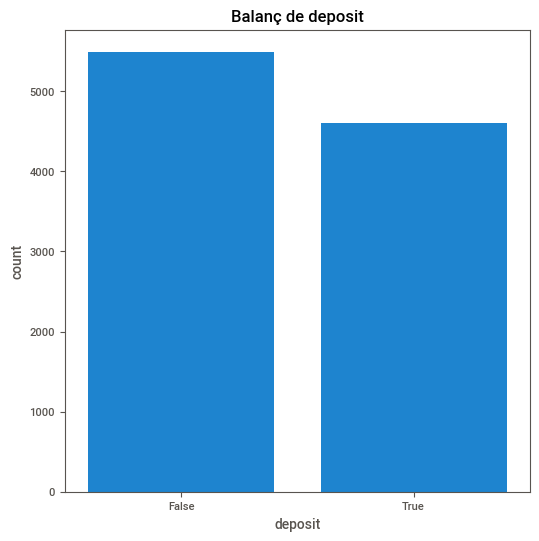

In [24]:
# calculem la relació de True/False per a la variable deposit
deposit_ratio = df_transformed['deposit'].value_counts(normalize=True)
print(deposit_ratio)

# balanç de deposit
plt.figure(figsize=(6, 6))
sns.countplot(x='deposit', data=df_transformed)
plt.title('Balanç de deposit')
plt.show()

Es pot veure que hi ha una majoria de clients que no s'han subscrit a un dipòsit, però **la diferència no és molt gran**. Aquest fet ens facilita la tasca de gestionar el desbalanç de classes, ja que no és necessari aplicar tècniques de sub o sobremostreig.

En cas que s'hagués de realitzar alguna tècnica de sub o sobremostreig, es podrien eliminar aleatòriament registres de la classe majoritària (en aquest cas, `no`) per aconseguir un equilibri entre les dues classes. Hi ha un nombre prou elevat de casos com per a no perdre informació important.

## Conclusions

L'anàlisi exploratòria de dades (EDA) realitzada sobre el dataset del banc ha proporcionat una visió detallada de la distribució de les variables, la presència de valors atípics i la rellevància de diferents factors en la predicció de la subscripció a dipòsits a termini.

### 1. Descripció General del Dataset
- El dataset conté **11.162 registres** i **17 variables**, de les quals **6 són numèriques, 7 categòriques i 4 binàries**.
- Les variables tenen una baixa proporció de **valors nuls (< 0,2%)**. Aquestes dades faltants s'han imputat mitjançant la **mediana** (per a variables numèriques) i la **moda** (per a categòriques i binàries).

### 2. Detecció i Gestió d'Outliers
- L'anàlisi dels **boxplots** i els **histogrames** ha revelat una presència significativa de **valors atípics** en totes les variables numèriques.
- L'aplicació del **mètode IQR** resultava en l'eliminació d'una part substancial de les dades, fet que no s'ha considerat viable.  
- El **mètode Z-score** s'ha mostrat més efectiu, reduint els outliers de manera més equilibrada i mantenint la fiabilitat de les dades.

### 3. Rellevància de les Variables
- La correlació amb la variable objectiu (`deposit`) indica que la **durada de la trucada** (`duration`) és el predictor més fort (correlació de **0,48**).
- Altres variables rellevants són el **resultat de campanyes prèvies** (`poutcome_success`) i el **nombre de contactes previs** (`previous`).
- Variables com el **canal de contacte desconegut** (`contact_unknown`) o la **presència d'una hipoteca** (`housing`) redueixen significativament la probabilitat de subscripció.

### 4. Desbalanç de Classes
- La variable objectiu presenta un lleuger **desbalanç** (45,6% de clients subscrits a dipòsits), però no prou significatiu com per requerir tècniques de sub o sobremostreig.

### Consideracions Finals
- L'EDA ha permès obtenir una comprensió profunda de les dades i ha proporcionat informació clau per a futures fases de modelatge predictiu.
- Les variables identificades amb més correlació amb la variable objectiu es poden utilitzar per construir models de classificació amb més precisió.

Aquesta anàlisi constitueix una base sòlida per avançar cap a la construcció de **models de predicció robustos i fiables**.

In [25]:
# guardem les dades tractades en un nou fitxer CSV
df_no_outliers.to_csv('data/bank_dataset_cleaned.csv', index=False)